# 1. Model Architecture Summary

### Model 1: GRU-based network with 64 units and dense layers. The model is trained to predict measured_y, measured_z, and theta based on trap positions.
### Model 2: LSTM-based network with 64 units and dense layers. A custom loss function is defined to minimize the deviation between the predicted and actual reference positions by incorporating predictions from Model 1.

# 2. Key Metrics

### Model 1:
        Training Time: X seconds
        Inference Time: Y seconds per sample
        R-Squared: Z
        MSE: A
        MAE: B

# 3. Loss Evolution

## Plots showcasing the evolution of training and validation loss during training for both models.
### Model 1: Training vs. Validation Loss
### Model 2: Training vs. Validation Loss with custom loss function

# 4. Prediction Comparisons

### Model 1 Predictions:
#### Comparison of predicted and actual positions for measured_y, measured_z, and theta.
#### Scatter plots and reference comparisons.
### Model 2 Predictions:
#### Comparison of predicted reference positions (using traps_y, traps_z) against actual reference positions.

# 5. Visualization of Results


Import required libraries for data handling, preprocessing, neural network creation, and visualization

In [56]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from tensorflow.keras import regularizers , callbacks
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM, Bidirectional, Dense
from tensorflow.keras.callbacks import EarlyStopping, Callback
import time

In [57]:
data = pd.read_csv('C:/Optimal Control/optitrap_alg_final/Levitator_Data/mirror_image/data_mirror_new_theta.csv')



In [58]:
# Select input features (traps' positions and theta) and output labels (measured positions and theta)
input_train =data[['traps_y','traps_z','theta']].values
output_train =data[['measured_y','measured_z','theta']].values

from sklearn.preprocessing import StandardScaler
# Reshape the input data to 3D, which is required for LSTM/GRU models [samples, timesteps, features]
input_train = input_train.reshape((input_train.shape[0], 1, input_train.shape[1]))

indices = np.arange(input_train.shape[0])
# Split the data into training and testing sets (using 30% for testing)
X_train, X_test, y_train, y_test, train_indices,test_indices = train_test_split(
    input_train, output_train_scaled, indices, test_size=0.30, random_state=42)

# Define the model architecture with a GRU layer followed by dense layers
model1 = tf.keras.models.Sequential([
    tf.keras.layers.GRU(64, activation='relu', input_shape=(1, 3), return_sequences=False),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(output_train.shape[1])
])

# Compile the model using the mean squared error loss and Adam optimizer
model1.compile(loss='mean_squared_error', optimizer='adam')

# Early stopping callback to stop training if validation loss doesn't improve for 50 epochs
early_stopping_callback = callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Record the training start time
start_time_training = time.time()
# Train the model for 700 epochs with validation and early stopping
history = model1.fit(X_train, y_train, epochs=700, verbose=1, validation_split=0.1, callbacks=[early_stopping_callback])

# Record the end time for training and calculate the total training time
end_time_training = time.time()
training_time = end_time_training - start_time_training

# Record the inference time to make predictions on the test data
start_time_inference = time.time()
predictions = model1.predict(X_test)
end_time_inference = time.time()


Epoch 1/700
195/195 [==============================] - 2s 3ms/step - loss: 795.2582 - val_loss: 2.2869
Epoch 2/700
195/195 [==============================] - 0s 2ms/step - loss: 1.9395 - val_loss: 1.6076
Epoch 3/700
195/195 [==============================] - 0s 1ms/step - loss: 1.1042 - val_loss: 0.7695
Epoch 4/700
195/195 [==============================] - 0s 1ms/step - loss: 0.5926 - val_loss: 0.4874
Epoch 5/700
195/195 [==============================] - 0s 1ms/step - loss: 0.4855 - val_loss: 0.4558
Epoch 6/700
195/195 [==============================] - 0s 2ms/step - loss: 0.4583 - val_loss: 0.4098
Epoch 7/700
195/195 [==============================] - 0s 2ms/step - loss: 0.4307 - val_loss: 0.3833
Epoch 8/700
195/195 [==============================] - 0s 1ms/step - loss: 0.3895 - val_loss: 0.4455
Epoch 9/700
195/195 [==============================] - 0s 1ms/step - loss: 0.3890 - val_loss: 0.4139
Epoch 10/700
195/195 [==============================] - 0s 1ms/step - loss: 0.4028 - val_

Epoch 161/700
195/195 [==============================] - 0s 2ms/step - loss: 0.0885 - val_loss: 0.1151
Epoch 162/700
195/195 [==============================] - 0s 2ms/step - loss: 0.0934 - val_loss: 0.1024
Epoch 163/700
195/195 [==============================] - 0s 2ms/step - loss: 0.0923 - val_loss: 0.1027
Epoch 164/700
195/195 [==============================] - 0s 2ms/step - loss: 0.0858 - val_loss: 0.0750
Epoch 165/700
195/195 [==============================] - 0s 2ms/step - loss: 0.0694 - val_loss: 0.0525
Epoch 166/700
195/195 [==============================] - 0s 2ms/step - loss: 0.0766 - val_loss: 0.0565
Epoch 167/700
195/195 [==============================] - 0s 2ms/step - loss: 0.0794 - val_loss: 0.0699
Epoch 168/700
195/195 [==============================] - 0s 2ms/step - loss: 0.0901 - val_loss: 0.0800
Epoch 169/700
195/195 [==============================] - 0s 2ms/step - loss: 0.0953 - val_loss: 0.0569
Epoch 170/700
195/195 [==============================] - 0s 2ms/step - lo

In [59]:
# Calculate the total inference time and display both training and inference times
inference_time = end_time_inference - start_time_inference
print(f'Training Time: {training_time:.2f} seconds')
print(f'Inference Time: {inference_time:.4f} seconds per sample')

Training Time: 79.77 seconds
Inference Time: 0.3206 seconds per sample


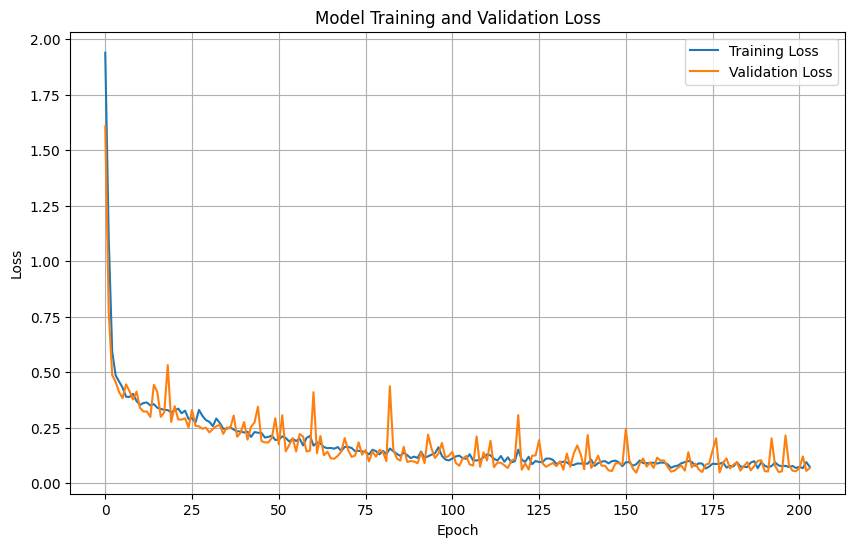

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))


loss_values_from_third_epoch = history.history['loss'][1:]
val_loss_values = history.history['val_loss'][1:]

# Now plot starting from the 3rd epoch

plt.plot(loss_values_from_third_epoch, label='Training Loss')
plt.plot(val_loss_values, label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend()
plt.savefig('Model Training and Validation Loss.png',format='png')

plt.show()


In [61]:
# Evaluate the model's performance by calculating the R-squared value and mean squared error on the test data
r2 = r2_score(y_test, predictions)

print(f'R-squared: {r2}')
mse = model1.evaluate(X_test, y_test)
mae = np.mean(np.abs(predictions - y_test))
print(f'Model1 MSE: {mse}, MAE: {mae}')

R-squared: 0.9996198850533334
93/93 [==============================] - 0s 2ms/step - loss: 0.0480
Model1 MSE: 0.04796293005347252, MAE: 0.1325402312399289


In [62]:
# Create a DataFrame for predictions and rename columns appropriately
predictions_df = pd.DataFrame(predictions)
predictions_df

,0,1,2
0,-39.549477,102.605942,2.693932
1,-41.518883,111.782722,2.954646
2,-26.025038,120.570267,4.766483
3,35.190033,132.748322,0.321521
4,-16.991871,111.929390,4.892940
...,...,...,...
2962,27.209698,138.798981,0.469218
2963,-26.566151,121.211571,4.746980
2964,40.336811,113.766556,6.117141
2965,-35.004066,113.129959,1.619314


In [63]:


predictions_df.columns = ['0','1','2']  # Clear any existing column names
predictions_df.columns = [ 'measured_y', 'measured_z','theta']


In [64]:
# Extract reference positions from the dataset for further comparison with predictions
reference_y = data.loc[test_indices, 'reference_y'].values
reference_z = data.loc[test_indices, 'reference_z'].values

# Create a lookup table containing measured and reference positions
lookup_table = pd.DataFrame({
    'theta': predictions_df['theta'],
#     'measured_x': predictions_df['measured_x'],
    'measured_y': predictions_df['measured_y'],
    'measured_z': predictions_df['measured_z'],
#     'traps_x': input_train[test_indices, 1],
    'traps_y': input_train[test_indices, 0],
    'traps_z': input_train[test_indices, 1],
#     'simulated_x': bead_x,
    'reference_y': reference_y,
    'reference_z': reference_z,
})
lookup_table

,theta,measured_y,measured_z,traps_y,traps_z,reference_y,reference_z
0,2.693932,-39.549477,102.605942,-43.858305,103.682749,-43.841686,103.360943
1,2.954646,-41.518883,111.782722,-43.110879,112.076170,-42.775556,111.927768
2,4.766483,-26.025038,120.570267,-27.302437,117.937062,-28.508862,117.895477
3,0.321521,35.190033,132.748322,34.222157,133.354134,35.885862,133.557822
4,4.892940,-16.991871,111.929390,-17.635968,109.918091,-18.464252,109.732995
...,...,...,...,...,...,...,...
2962,0.469218,27.209698,138.798981,25.845103,138.351896,27.183214,138.653718
2963,4.746980,-26.566151,121.211571,-27.901015,118.520598,-29.128234,118.490183
2964,6.117141,40.336811,113.766556,39.792526,113.610067,41.502822,113.538425
2965,1.619314,-35.004066,113.129959,-33.884107,113.754279,-35.293491,113.652881


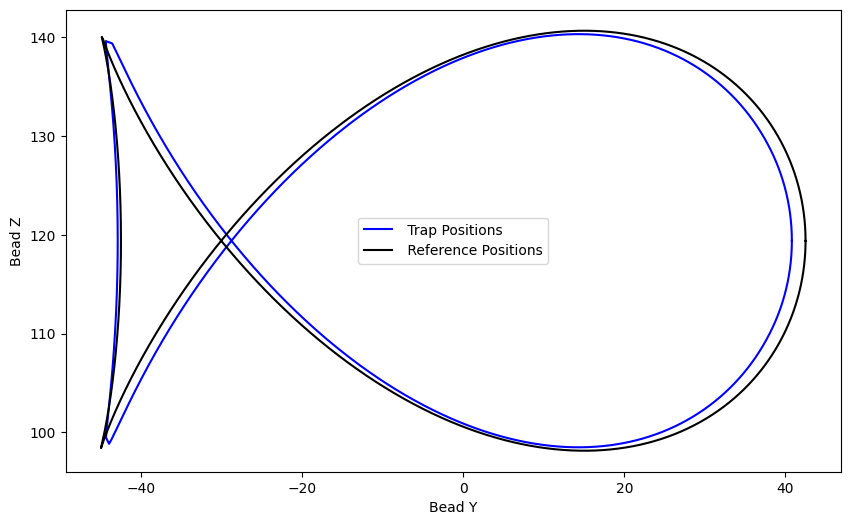

In [65]:

# Plotting reference vs trap positions
plt.figure(figsize=(10, 6))
plt.plot(data['traps_y'], data['traps_z'], color='blue', label=' Trap Positions')
plt.plot(data['reference_y'], data['reference_z'], color='black', label=' Reference Positions')
# plt.scatter(lookup_table['measured_y'], lookup_table['measured_z'], color='pink', label='measured Positions')

plt.xlabel('Bead Y')
plt.ylabel('Bead Z')
plt.legend()
plt.show()

# Model 2: Custom Model with LSTM and Custom Loss Function

In [69]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Extract and scale input and output data
input_nn2 = lookup_table[['measured_y', 'measured_z', 'theta']].values
output_nn2 = lookup_table[['traps_y', 'traps_z', 'reference_y', 'reference_z', 'theta']].values

# Reshape the data for LSTM input
input_scaled_nn2 = input_nn2.reshape((input_nn2.shape[0], 1, input_nn2.shape[1]))
output_scaled_nn2 = output_nn2

# Split the data into training and testing sets
X_train_nn2, X_test_nn2, y_train_nn2, y_test_nn2 = train_test_split(input_scaled_nn2, output_scaled_nn2, test_size=0.15, random_state=42)

# Define the second model architecture
model2 = Sequential([
    LSTM(64, activation='relu', input_shape=(1, input_nn2.shape[1]), return_sequences=False),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(output_nn2.shape[1])
])

# Custom cost function
def custom_cost_function(y_true_nn2, y_pred_nn2):
    batch_size = tf.shape(y_pred_nn2)[0]

    # Extract theta and predicted positions from y_pred
    traps_pred = y_pred_nn2[:, 0:2]
    theta_pred = y_pred_nn2[:, 4:5]

    # Reshape to match the input shape for model1
    input_for_nn1 = tf.concat([traps_pred, theta_pred], axis=1)
    input_for_nn1 = tf.expand_dims(input_for_nn1, axis=1)  # Reshape

    # Get predicted bead positions from model1
    predicted_bead_positions = model1(input_for_nn1, training=False)

    # Extract true reference_y and reference+_z from y_true
    true_reference_positions = y_true_nn2[:, 2:5]

    # Calculate loss
    deviation = tf.reduce_mean(tf.reduce_sum(tf.abs(predicted_bead_positions - true_reference_positions), axis=1)) 

    return deviation

# Compile and train the model with the custom cost function
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

model2.compile(loss=custom_cost_function, optimizer='adam')


start_time_training = time.time()
history = model2.fit(X_train_nn2, y_train_nn2, epochs=400, verbose=1, validation_split=0.1, callbacks=[early_stopping_callback])
end_time_training = time.time()
training_time = end_time_training - start_time_training

start_time_inference = time.time()
y_pred_nn2 = model2.predict(X_test_nn2)
end_time_inference = time.time()




# Plotting predictions vs actual outputs
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test[:, 3], y_test[:, 4], color='orange', label='Reference Positions')
# plt.scatter(y_pred[:, 3], y_pred[:, 4], color='blue', label='Predicted Positions')
# plt.xlabel('Bead Y')
# plt.ylabel('Bead Z')
# plt.legend()
# plt.show()


Epoch 1/400
71/71 [==============================] - 3s 8ms/step - loss: 67.5824 - val_loss: 14.9832
Epoch 2/400
71/71 [==============================] - 0s 3ms/step - loss: 13.1330 - val_loss: 11.8076
Epoch 3/400
71/71 [==============================] - 0s 4ms/step - loss: 10.7500 - val_loss: 9.9826
Epoch 4/400
71/71 [==============================] - 0s 4ms/step - loss: 9.7157 - val_loss: 9.6329
Epoch 5/400
71/71 [==============================] - 0s 3ms/step - loss: 9.5054 - val_loss: 9.4496
Epoch 6/400
71/71 [==============================] - 0s 3ms/step - loss: 9.4761 - val_loss: 9.3972
Epoch 7/400
71/71 [==============================] - 0s 3ms/step - loss: 9.1202 - val_loss: 9.1469
Epoch 8/400
71/71 [==============================] - 0s 4ms/step - loss: 9.2184 - val_loss: 8.9871
Epoch 9/400
71/71 [==============================] - 0s 3ms/step - loss: 8.9194 - val_loss: 8.8164
Epoch 10/400
71/71 [==============================] - 0s 3ms/step - loss: 8.8970 - val_loss: 8.8327
Epoc

Epoch 83/400
71/71 [==============================] - 0s 3ms/step - loss: 7.9741 - val_loss: 8.1510
Epoch 84/400
71/71 [==============================] - 0s 3ms/step - loss: 7.9537 - val_loss: 8.0719
Epoch 85/400
71/71 [==============================] - 0s 4ms/step - loss: 8.0240 - val_loss: 8.1370
Epoch 86/400
71/71 [==============================] - 0s 3ms/step - loss: 8.1058 - val_loss: 7.8683
Epoch 87/400
71/71 [==============================] - 0s 3ms/step - loss: 7.9802 - val_loss: 7.9369
Epoch 88/400
71/71 [==============================] - 0s 3ms/step - loss: 8.0814 - val_loss: 8.7226
Epoch 89/400
71/71 [==============================] - 0s 3ms/step - loss: 7.9582 - val_loss: 8.1052
Epoch 90/400
71/71 [==============================] - 0s 3ms/step - loss: 7.9761 - val_loss: 8.0973
Epoch 91/400
71/71 [==============================] - 0s 3ms/step - loss: 8.0554 - val_loss: 7.9414
Epoch 92/400
71/71 [==============================] - 0s 3ms/step - loss: 8.0610 - val_loss: 8.0019


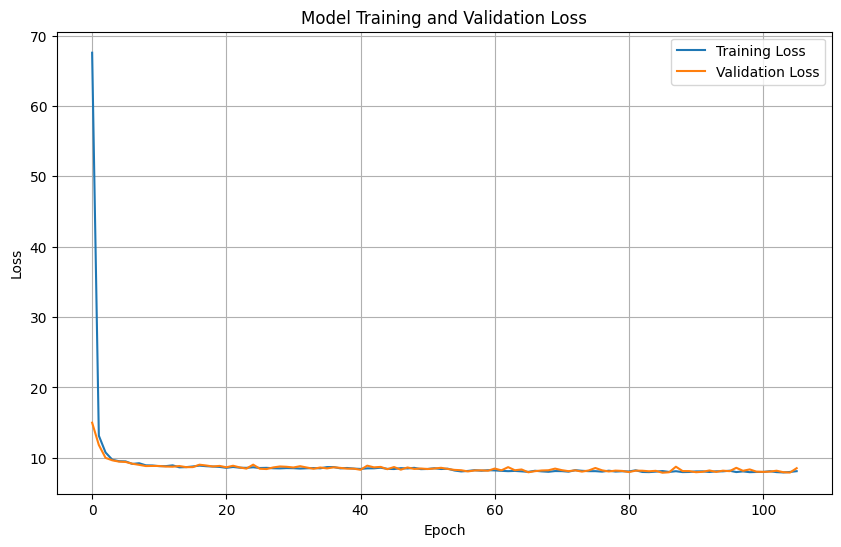

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))


loss_values_from_third_epoch = history.history['loss'][:]
val_loss_values = history.history['val_loss'][:]

# Now plot starting from the 3rd epoch

plt.plot(loss_values_from_third_epoch, label='Training Loss')
plt.plot(val_loss_values, label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend()
plt.savefig('Model Training and Validation Loss Model 2 OG.png', format='png')

plt.show()


In [71]:
inference_time = end_time_inference - start_time_inference
print(f'Training Time: {training_time:.2f} seconds')
print(f'Inference Time: {inference_time:.4f} seconds per sample')

Training Time: 27.86 seconds
Inference Time: 0.2081 seconds per sample


In [72]:
model2 = load_model('model2_OG.keras', custom_objects={'custom_cost_function': custom_cost_function})


In [73]:
history = model2.fit(X_train_nn2, y_train_nn2, epochs=400, verbose=1, validation_split=0.1, callbacks=[early_stopping_callback])
y_pred_nn2 = model2.predict(X_test_nn2)


Epoch 1/400
71/71 [==============================] - 2s 8ms/step - loss: 1.3903 - val_loss: 1.1127
Epoch 2/400
71/71 [==============================] - 0s 3ms/step - loss: 1.3544 - val_loss: 1.3068
Epoch 3/400
71/71 [==============================] - 0s 3ms/step - loss: 1.3202 - val_loss: 1.3849
Epoch 4/400
71/71 [==============================] - 0s 4ms/step - loss: 1.5688 - val_loss: 2.1125
Epoch 5/400
71/71 [==============================] - 0s 4ms/step - loss: 1.3342 - val_loss: 1.4022
Epoch 6/400
71/71 [==============================] - 0s 3ms/step - loss: 1.6547 - val_loss: 1.5538
Epoch 7/400
71/71 [==============================] - 0s 3ms/step - loss: 1.2729 - val_loss: 0.9685
Epoch 8/400
71/71 [==============================] - 0s 3ms/step - loss: 1.2724 - val_loss: 1.1895
Epoch 9/400
71/71 [==============================] - 0s 3ms/step - loss: 1.2857 - val_loss: 0.8968
Epoch 10/400
71/71 [==============================] - 0s 3ms/step - loss: 1.0720 - val_loss: 1.0067
Epoch 11/

In [74]:
y_test_nn2.shape

(446, 5)

In [75]:
np.save('y_test_nn2_baseline.npy', y_test_nn2)

In [76]:
np.save('y_pred_nn2_baseline.npy', y_pred_nn2)

Predictions: [[ 25.92506    138.1844     -17.866014   -16.991783     0.37351346]
 [-43.40354    106.689705    -4.51812     -8.382996     2.220093  ]
 [-32.681763   116.4473      -7.7460604  -10.387569     1.6542428 ]
 [-40.04736    136.81941     -9.4192     -10.621198     3.8192303 ]
 [ 41.85687    126.60571    -22.246355   -15.461806     0.24076009]]
Actual Outputs: [[ 2.63068491e+01  1.38177197e+02  2.76663011e+01  1.38475481e+02
   5.03636599e-01]
 [-4.35919191e+01  1.06074157e+02 -4.34433205e+01  1.05802468e+02
   2.75438166e+00]
 [-3.18906075e+01  1.16079676e+02 -3.32455229e+01  1.16026731e+02
   1.60725665e+00]
 [-4.42404887e+01  1.38196488e+02 -4.45017996e+01  1.38584941e+02
   3.59049916e+00]
 [ 3.96919393e+01  1.25465585e+02  4.14031843e+01  1.25540756e+02
   3.15565988e-02]]


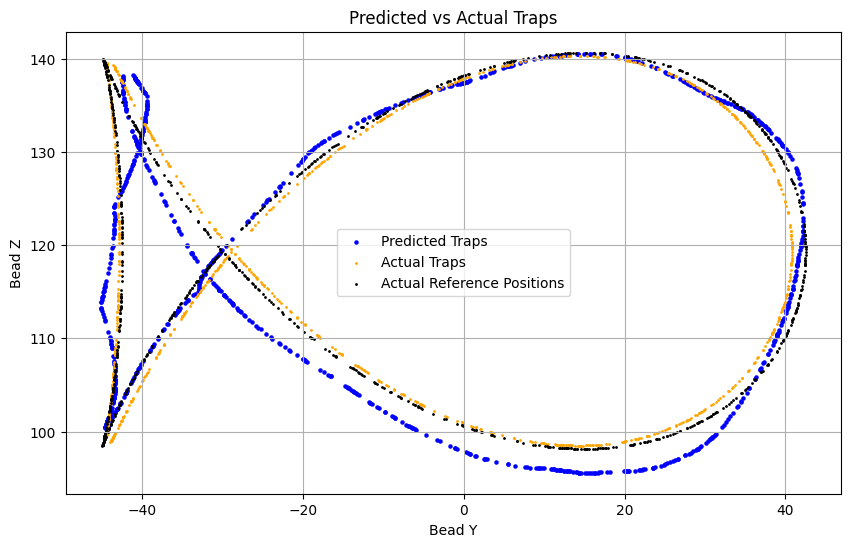

In [17]:
# Predict on the test set
# predictions_nn2 = model2.predict(X_test)

# Print predictions and actual outputs for comparison
print("Predictions:", y_pred_nn2[:5])
print("Actual Outputs:", y_test_nn2[:5])

# Plot the predictions vs reference positions
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_nn2[:, 0], y_pred_nn2[:, 1], color='blue', label='Predicted Traps', s=5)
plt.scatter(y_test_nn2[:, 0], y_test_nn2[:, 1], color='orange', label='Actual Traps',s=1)
plt.scatter(y_test_nn2[:, 2], y_test_nn2[:, 3], color='black', label='Actual Reference Positions',s=1)
# plt.scatter(lookup_table['measured_y'], lookup_table['measured_z'], color='pink', label='measured Positions')
plt.title('Predicted vs Actual Traps')
plt.xlabel('Bead Y')
plt.ylabel('Bead Z')
plt.legend()
plt.grid()

plt.savefig('Predicted vs Actual Traps.png', format='png')
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test_nn2[:, 0:2], y_pred_nn2[:, 0:2])
mae = mean_absolute_error(y_test_nn2[:, 0:2], y_pred_nn2[:, 0:2])
r2 = r2_score(y_test_nn2[:, 0:2], y_pred_nn2[:, 0:2])

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 2.2686929430522147
Mean Absolute Error: 1.1370182042540509
R-squared: 0.9932129572159168


In [19]:
y_test_nn2.shape

(950, 5)

In [20]:
input_for_model1 = np.concatenate([y_pred_nn2[:, 0:2], y_pred_nn2[:, 4:5]], axis=1)
input_for_model1 = input_for_model1.reshape((input_for_model1.shape[0], 1, input_for_model1.shape[1]))

# Predict using model1 with the final input
final_predictions = model1.predict(input_for_model1)
final_predictions

30/30 [==============================] - 0s 982us/step


array([[ 27.368189 , 138.52255  ,   0.4463492],
       [-43.1564   , 105.82474  ,   2.1390758],
       [-33.332157 , 116.07903  ,   1.6461599],
       ...,
       [-26.539232 , 115.98551  ,   4.5853715],
       [-40.95876  , 139.50685  ,   3.9696689],
       [-29.64861  , 119.00698  ,   4.4824777]], dtype=float32)

In [21]:
final_predictions.shape

(950, 3)

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(final_predictions[:, 0:2], y_test_nn2[:, 2:4])
mae = mean_absolute_error(final_predictions[:, 0:2], y_test_nn2[:, 2:4])
r2 = r2_score(final_predictions[:, 0:2], y_test_nn2[:, 2:4])

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 1.3432304155638977
Mean Absolute Error: 0.4750223275060367
R-squared: 0.9986103751307508


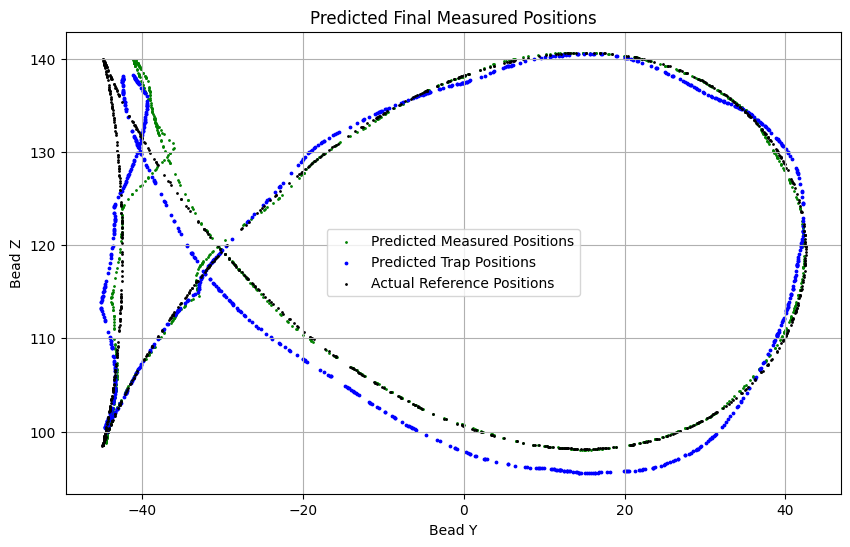

In [23]:
plt.figure(figsize=(10, 6))
# plt.scatter(y_test_nn2[:, 0], y_test_nn2[:, 1], color='orange', label='original trap Positions')

plt.scatter(final_predictions[:, 0], final_predictions[:, 1], color='green', label='Predicted Measured Positions',s=1)
plt.scatter(y_pred_nn2[:, 0], y_pred_nn2[:, 1], color='blue', label='Predicted Trap Positions', s=3)
plt.scatter(y_test_nn2[:, 2], y_test_nn2[:, 3], color='black', label='Actual Reference Positions',s=1)
plt.title('Predicted Final Measured Positions')
plt.xlabel('Bead Y')
plt.ylabel('Bead Z')
plt.grid()
plt.legend()

plt.savefig('Predicted Final Measured Positions.png',format='png')
plt.show()

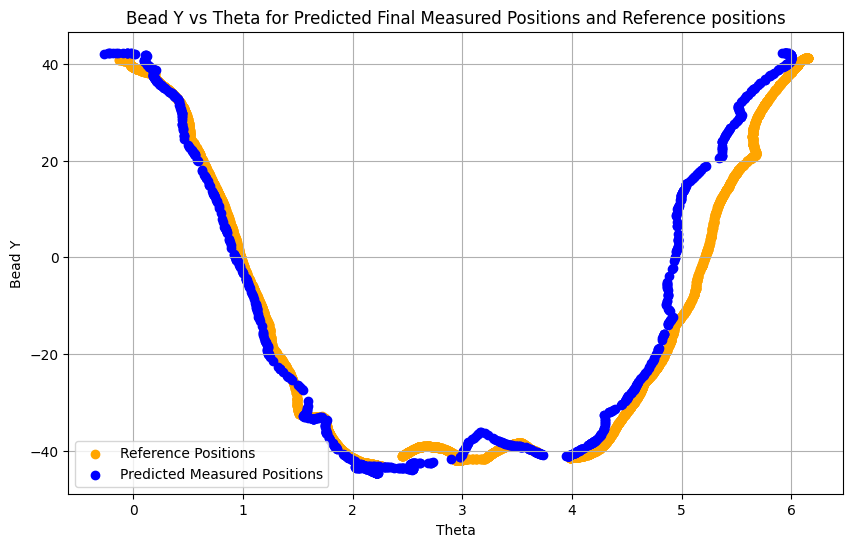

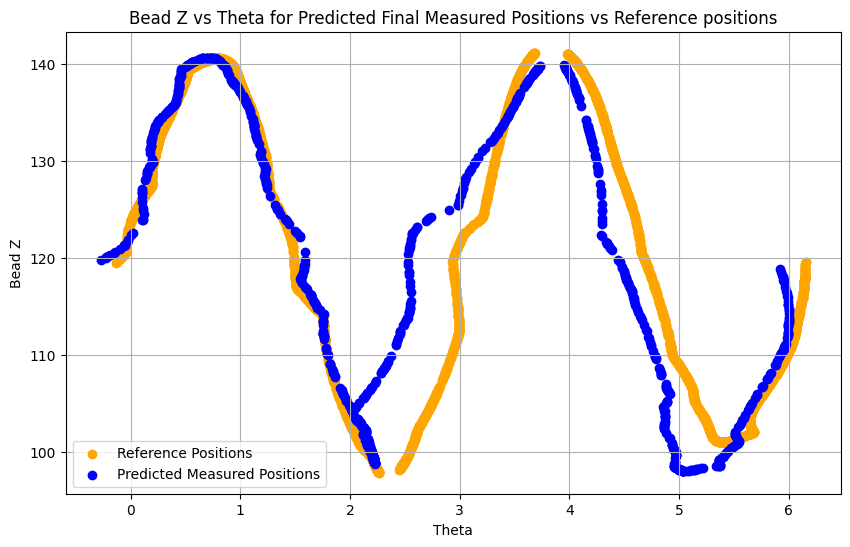

In [24]:

# Convert final predictions to DataFrame and add theta
final_predictions_df = pd.DataFrame(final_predictions, columns=['measured_y', 'measured_z', 'theta'])

# Sort final predictions by theta
final_predictions_sorted = final_predictions_df.sort_values(by=['theta','measured_y','measured_z'], ascending=True)

# Plotting predictions vs actual outputs sorted by theta
plt.figure(figsize=(10, 6))
plt.scatter(lookup_table['theta'], lookup_table['measured_y'], color='orange', label='Reference Positions')
plt.scatter(final_predictions_sorted['theta'], final_predictions_sorted['measured_y'], color='blue', label='Predicted Measured Positions')
plt.xlabel('Theta')
plt.ylabel('Bead Y')
plt.title('Bead Y vs Theta for Predicted Final Measured Positions and Reference positions')
plt.savefig('BeadYtheta.png',format='png')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(lookup_table['theta'], lookup_table['measured_z'], color='orange', label='Reference Positions')
plt.scatter(final_predictions_sorted['theta'], final_predictions_sorted['measured_z'], color='blue', label='Predicted Measured Positions')
plt.xlabel('Theta')
plt.ylabel('Bead Z')
plt.title('Bead Z vs Theta for Predicted Final Measured Positions vs Reference positions')
plt.savefig('BeadZtheta.png',format='png')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# model1.save('model1_baseline.h5')

In [ ]:
# model2.save('model2_baseline.h5')

In [33]:
baseline = np.abs(y_test_nn2 - y_pred_nn2)[:, 0]  # Replace with actual predictions

# Save the errors to .npy files
np.save('baseline.npy', baseline)